# 나랑 닮은 연예인을 찾아보자

**Rubric**
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.	\
    닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.	\
    다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.

3. 다양하고 재미있는 결과 시각화를 시도하였다.\
    matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.

## 목차
1. 사진모으기
2. 얼굴 영역 자르기
3. 얼굴 영역의 임베딩 추출하기
4. 모은 연예인들과 비교하기
5. 다양한 재미있는 시각화 시도해보기
6. 회고
7. Reference
___

In [1]:
# 모듈 불러오기
import face_recognition
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

print(face_recognition.__version__)
print(np.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


## 1. 사진 모으기

- 내 사진 2장 이상 모으기
- 비교할 연예인 사진 모으기

In [2]:
import os
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['차승원.jpg', '이희준.jpg', '장원준.jpeg', '러블리즈예인.jpg', '박정민.jpg', 'biden.jpg', '정형돈.jpg', '이말년.png', '목진화.png', '이대호.jpeg', '이승철.jpeg', '공효진.jpg', '박성호.jpg', '블랙핑크제니.jpg', '지수.jpg', '정민철.jpg', '다니엘 크레이그.jpeg', '트와이스다현.jpeg', '최양락.jpg', '유리.jpg', '개리.jpg', '권태원.jpeg', '김경진.png', '노무현.jpeg', '노홍철.jpeg', '문재인.jpeg', '서장훈.jpg', '크리스 햄스워스.jpg', '레인보우재경.jpg', '이경규.jpeg', '김희철.jpg', '한기범.jpg', '유해진.jpg', '유노윤호.jpg', '장도연.jpg', '내사진4.jpg', '배성재.jpg', '뷔.png', '카이.jpg', '클린트 이스트우드.jpg', '백현.jpg', '김영삼.jpeg', '하정우.jpg', '김학범.jpg', '하승진.jpg', '차두리.jpeg', '트와이스쯔위.jpg', '조이현.jpg', '서현진.png', '전소미.jpg', '대도서관.jpeg', '딕헌터.jpeg', '로제.jpg', '박해일.jpeg', '잭 니콜슨.jpeg', '아이린.jpeg', '줄리엔강.png', '장혁.jpg', '트와이스모모.jpeg', '이영지.jpg', '세훈.jpg', '슬기.jpg', '잇섭.png', '솔라.jpg', '슬리피.jpg', '장나라.png', '곽도원.jpg', '화사.jpg', '트와이스미나.jpg', '이영하.jpg', '무라니시.png', '이명박.jpg', '제이홉.jpg', '벤틀리.jpg', '이준혁.jpeg', '안효섭.jpg', '잭 갤리퍼내키스.jpg', '윤종신.jpeg', '조원희.jpg', '아놀드 슈워제네거.jpg', '내사진1.jpg', '야마다 타카유키.jpeg', '정호연.jpg', '이성민.

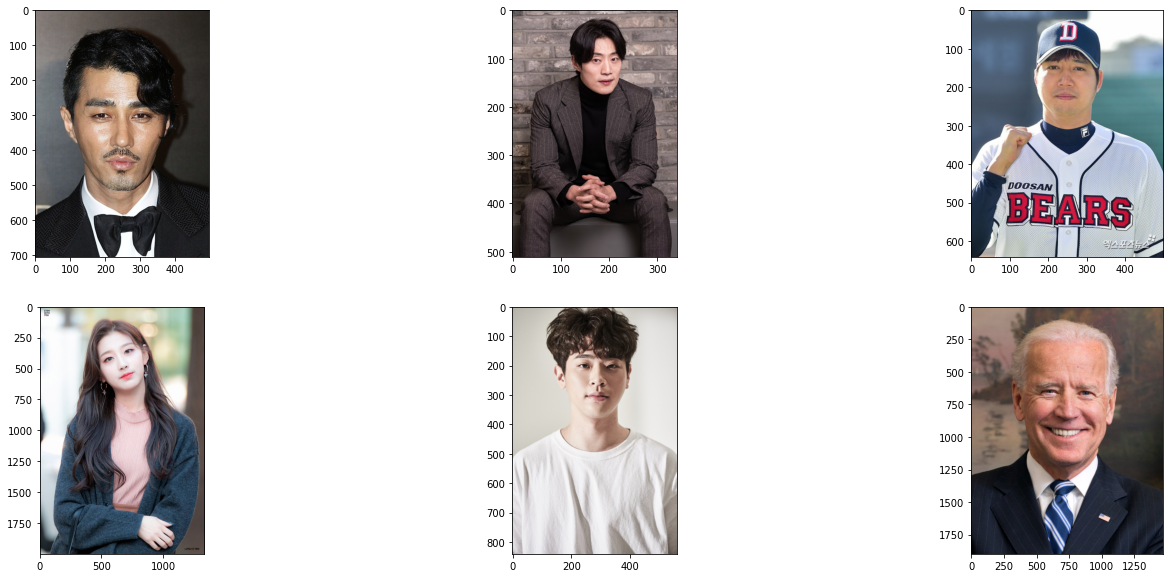

In [3]:
# 이미지 일부 확인하기
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

이미지 사진이 아닌 파일이 포함되어 있으므로 해당 파일은 삭제해준다

In [4]:
print(file_list.index('.ipynb_checkpoints'))
print(file_list.index('celebrity.zip'))

227
249


In [5]:
del file_list[227]
del file_list[249]

In [6]:
print ("file_list: {}".format(file_list))

file_list: ['차승원.jpg', '이희준.jpg', '장원준.jpeg', '러블리즈예인.jpg', '박정민.jpg', 'biden.jpg', '정형돈.jpg', '이말년.png', '목진화.png', '이대호.jpeg', '이승철.jpeg', '공효진.jpg', '박성호.jpg', '블랙핑크제니.jpg', '지수.jpg', '정민철.jpg', '다니엘 크레이그.jpeg', '트와이스다현.jpeg', '최양락.jpg', '유리.jpg', '개리.jpg', '권태원.jpeg', '김경진.png', '노무현.jpeg', '노홍철.jpeg', '문재인.jpeg', '서장훈.jpg', '크리스 햄스워스.jpg', '레인보우재경.jpg', '이경규.jpeg', '김희철.jpg', '한기범.jpg', '유해진.jpg', '유노윤호.jpg', '장도연.jpg', '내사진4.jpg', '배성재.jpg', '뷔.png', '카이.jpg', '클린트 이스트우드.jpg', '백현.jpg', '김영삼.jpeg', '하정우.jpg', '김학범.jpg', '하승진.jpg', '차두리.jpeg', '트와이스쯔위.jpg', '조이현.jpg', '서현진.png', '전소미.jpg', '대도서관.jpeg', '딕헌터.jpeg', '로제.jpg', '박해일.jpeg', '잭 니콜슨.jpeg', '아이린.jpeg', '줄리엔강.png', '장혁.jpg', '트와이스모모.jpeg', '이영지.jpg', '세훈.jpg', '슬기.jpg', '잇섭.png', '솔라.jpg', '슬리피.jpg', '장나라.png', '곽도원.jpg', '화사.jpg', '트와이스미나.jpg', '이영하.jpg', '무라니시.png', '이명박.jpg', '제이홉.jpg', '벤틀리.jpg', '이준혁.jpeg', '안효섭.jpg', '잭 갤리퍼내키스.jpg', '윤종신.jpeg', '조원희.jpg', '아놀드 슈워제네거.jpg', '내사진1.jpg', '야마다 타카유키.jpeg', '정호연.jpg', '이성민.

## 2. 얼굴 영역 자르기

In [7]:
# 얼굴 영역을 crop하는 함수 정의
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]

    return cropped_face

In [8]:
# 이미지 파일 함수 정의
def image_file(image):
    img_file = os.path.join(dir_path, image)
    return img_file

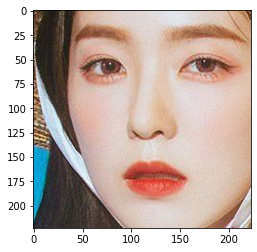

In [9]:
cropped_face = get_cropped_face(image_file('아이린.jpg'))
plt.imshow(cropped_face)

- 얼굴 영역이 잘 잘리는 것을 확인할 수 있다.

## 3. 얼굴 영역의 임베딩 추출하기

In [10]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수 정의

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [11]:
# 파일 경로를 넣으면 embedding_dict를 리턴하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try: 
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                #  embedding_dict[] 이미지 파일의 임베딩을 구해 담음 키=사람이름, 값=임베딩 벡터
                #  os.path.splitext(file)[0] 파일의 확장자를 제거한 이름만 추출
                #  embedding[0]은 넣고 싶은 요소값

        except:
            continue
            
    return embedding_dict

In [12]:
embedding_dict = get_face_embedding_dict(dir_path)

In [13]:
# get_face_embedding_dict() 함수가 잘 만들어졌는지 확인

embedding_dict['아이린']

array([-0.08805867,  0.11986135,  0.07976399, -0.08441514, -0.0758192 ,
       -0.00410643, -0.0620653 , -0.09386791,  0.13264799, -0.19538425,
        0.19163299, -0.09040625, -0.2330842 ,  0.01030738, -0.04114952,
        0.22866622, -0.15706864, -0.16562484, -0.0442335 ,  0.03853063,
        0.10554214,  0.08185939, -0.08126771,  0.02924508, -0.05179145,
       -0.29933929, -0.11778935, -0.00514889, -0.022684  , -0.08885596,
       -0.06366619,  0.01477497, -0.12732488,  0.00822144,  0.00332523,
        0.12562081,  0.0049771 , -0.1260664 ,  0.14475353,  0.03182003,
       -0.30926046,  0.12361823,  0.0839017 ,  0.27664787,  0.15847045,
       -0.0313253 , -0.04792144, -0.15168232,  0.09397148, -0.17421776,
        0.00539682,  0.11223388,  0.04115358,  0.07023486,  0.05250947,
       -0.11838657,  0.05840398,  0.07327914, -0.17471024, -0.01896054,
        0.14943653, -0.10198733,  0.04562671, -0.11519834,  0.17019431,
        0.06025903, -0.07023123, -0.24303067,  0.12359041, -0.15

## 4. 연예인들과 비교하기

In [14]:
# 인자로 파일명의 사람 이름 2개를 받아, 두 사람의 얼굴 임베딩 사이의 거리(L2)를 구하는 함수

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [15]:
# 내 사진끼리의 거리 확인해보기

get_distance('내사진3', '내사진4')

0.2760187251452716

- 내 사진 두 장의 거리를 측정해보니, 0.276의 가까운 거리가 측정된 것을 확인할 수 있다

In [16]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('trump')

In [17]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [19]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [20]:
# 나와 가장 닮은 사람은 누굴까?

get_nearest_face('내사진3')

순위 1 : 이름(내사진4), 거리(0.2760187251452716)
순위 2 : 이름(내사진1), 거리(0.29290012934485027)
순위 3 : 이름(제니), 거리(0.3385781398747648)
순위 4 : 이름(우기), 거리(0.3749717616164187)
순위 5 : 이름(장나라), 거리(0.3793197186733627)


In [21]:
me = get_cropped_face(image_file('내사진3.jpg'))
top_1_me = get_cropped_face(image_file('내사진4.jpg'))
top_2_me = get_cropped_face(image_file('제니.jpg'))
top_3_me = get_cropped_face(image_file('우기.jpg'))
top_4_me = get_cropped_face(image_file('장나라.png'))
top_5_me = get_cropped_face(image_file('신세경.jpg'))

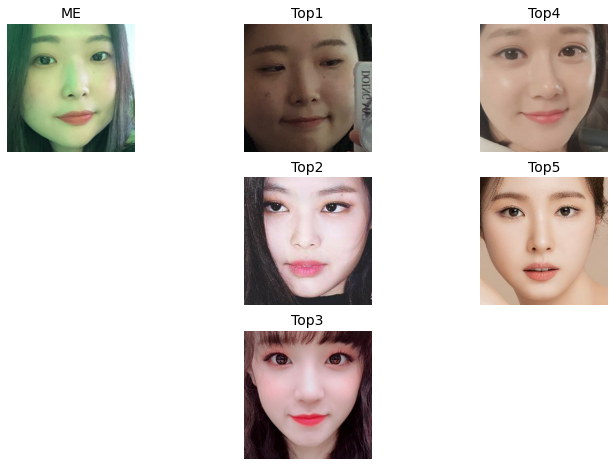

In [22]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(nrows=3, ncols=3, width_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("ME", fontsize=14)
ax1.imshow(me) # draw the first image
ax1.axis("off")

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Top1", fontsize=14)
ax2.imshow(top_1_me) # draw first image output
ax2.axis("off")

ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title("Top2", fontsize=14)
ax3.imshow(top_2_me) # draw first image output
ax3.axis("off")

ax4 = fig.add_subplot(gs[2, 1])
ax4.set_title("Top3", fontsize=14)
ax4.imshow(top_3_me) # draw first image output
ax4.axis("off")

ax5 = fig.add_subplot(gs[0, 2])
ax5.set_title("Top4", fontsize=14)
ax5.imshow(top_4_me) # draw first image output
ax5.axis("off")

ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title("Top5", fontsize=14)
ax6.imshow(top_5_me) # draw first image output
ax6.axis("off")

plt.show()

- 내 사진 두장이 꽤 다른 상태인 것 같은데 가장 가깝게 찾아낸 것이 신기하다.\
    어떻게 알았지?😅

In [23]:
get_nearest_face('내사진4')

순위 1 : 이름(내사진3), 거리(0.2760187251452716)
순위 2 : 이름(내사진1), 거리(0.2908379654050452)
순위 3 : 이름(장나라), 거리(0.3829751946037628)
순위 4 : 이름(김유정), 거리(0.3849401071384106)
순위 5 : 이름(아이즈원조유리), 거리(0.3887175886781766)


In [24]:
my3 = get_cropped_face(image_file('내사진4.jpg'))
top_1_my3 = get_cropped_face(image_file('내사진3.jpg'))
top_2_my3 = get_cropped_face(image_file('장나라.png'))
top_3_my3 = get_cropped_face(image_file('김유정.jpg'))
top_4_my3 = get_cropped_face(image_file('아이즈원조유리.jpeg'))
top_5_my3 = get_cropped_face(image_file('신세경.jpg'))

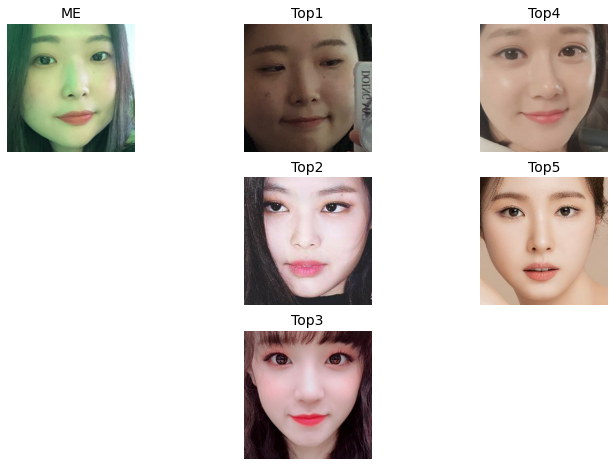

In [25]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(nrows=3, ncols=3, width_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("ME", fontsize=14)
ax1.imshow(me) # draw the first image
ax1.axis("off")

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Top1", fontsize=14)
ax2.imshow(top_1_me) # draw first image output
ax2.axis("off")

ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title("Top2", fontsize=14)
ax3.imshow(top_2_me) # draw first image output
ax3.axis("off")

ax4 = fig.add_subplot(gs[2, 1])
ax4.set_title("Top3", fontsize=14)
ax4.imshow(top_3_me) # draw first image output
ax4.axis("off")

ax5 = fig.add_subplot(gs[0, 2])
ax5.set_title("Top4", fontsize=14)
ax5.imshow(top_4_me) # draw first image output
ax5.axis("off")

ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title("Top5", fontsize=14)
ax6.imshow(top_5_me) # draw first image output
ax6.axis("off")

plt.show()

- 믿을 수 없는 결과이나, 신세경과 장나라가 닮은 꼴에 중복된다. 과연 믿을 수 있는 결과일까? (아닌걸 알지만 다른 실험도 해보자)

## 5. 다양한 재미있는 시각화 시도해보기

### (1)  나와 닮았다고 나온 연예인들의 닮은 꼴을 확인해보자

In [26]:
get_nearest_face('장나라')

순위 1 : 이름(윤아), 거리(0.3174469563505703)
순위 2 : 이름(카즈하), 거리(0.33938151747151857)
순위 3 : 이름(신현빈), 거리(0.34039716436501455)
순위 4 : 이름(아이유), 거리(0.34574543644333394)
순위 5 : 이름(손예진), 거리(0.3457687748920807)


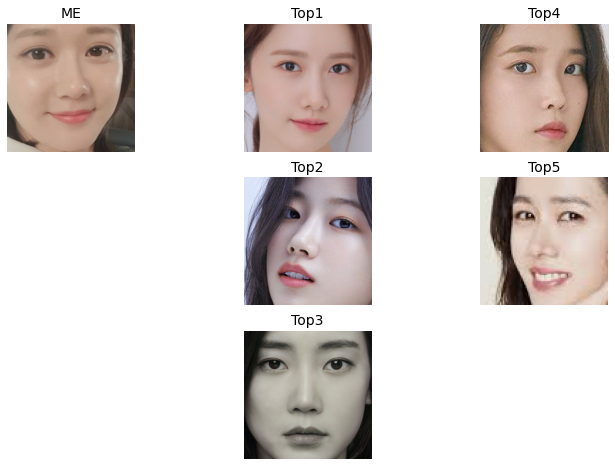

In [27]:
me = get_cropped_face(image_file('장나라.png'))
top_1_me = get_cropped_face(image_file('윤아.jpg'))
top_2_me = get_cropped_face(image_file('카즈하.jpg'))
top_3_me = get_cropped_face(image_file('신현빈.jpg'))
top_4_me = get_cropped_face(image_file('아이유.jpg'))
top_5_me = get_cropped_face(image_file('손예진.jpeg'))

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(nrows=3, ncols=3, width_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("ME", fontsize=14)
ax1.imshow(me) # draw the first image
ax1.axis("off")

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Top1", fontsize=14)
ax2.imshow(top_1_me) # draw first image output
ax2.axis("off")

ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title("Top2", fontsize=14)
ax3.imshow(top_2_me) # draw first image output
ax3.axis("off")

ax4 = fig.add_subplot(gs[2, 1])
ax4.set_title("Top3", fontsize=14)
ax4.imshow(top_3_me) # draw first image output
ax4.axis("off")

ax5 = fig.add_subplot(gs[0, 2])
ax5.set_title("Top4", fontsize=14)
ax5.imshow(top_4_me) # draw first image output
ax5.axis("off")

ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title("Top5", fontsize=14)
ax6.imshow(top_5_me) # draw first image output
ax6.axis("off")

plt.show()

In [28]:
get_nearest_face('신세경')

순위 1 : 이름(김유정), 거리(0.310889669410584)
순위 2 : 이름(사쿠라), 거리(0.32532784491188477)
순위 3 : 이름(트와이스사나), 거리(0.32829636800339207)
순위 4 : 이름(아린), 거리(0.32877117745469064)
순위 5 : 이름(아이린), 거리(0.3562509006701047)


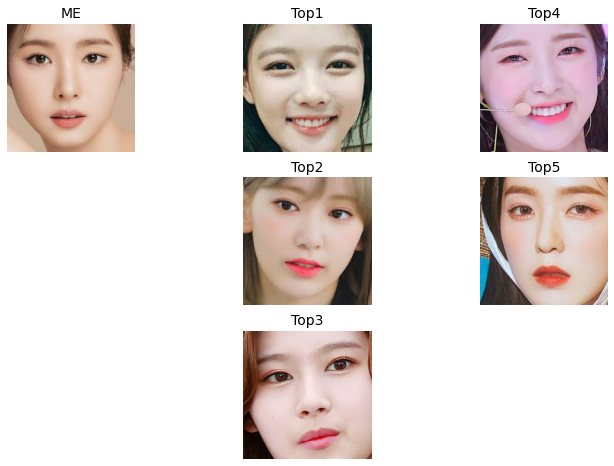

In [29]:
me = get_cropped_face(image_file('신세경.jpg'))
top_1_me = get_cropped_face(image_file('김유정.jpg'))
top_2_me = get_cropped_face(image_file('사쿠라.jpg'))
top_3_me = get_cropped_face(image_file('트와이스사나.jpg'))
top_4_me = get_cropped_face(image_file('아린.jpg'))
top_5_me = get_cropped_face(image_file('아이린.jpg'))

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(nrows=3, ncols=3, width_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("ME", fontsize=14)
ax1.imshow(me) # draw the first image
ax1.axis("off")

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Top1", fontsize=14)
ax2.imshow(top_1_me) # draw first image output
ax2.axis("off")

ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title("Top2", fontsize=14)
ax3.imshow(top_2_me) # draw first image output
ax3.axis("off")

ax4 = fig.add_subplot(gs[2, 1])
ax4.set_title("Top3", fontsize=14)
ax4.imshow(top_3_me) # draw first image output
ax4.axis("off")

ax5 = fig.add_subplot(gs[0, 2])
ax5.set_title("Top4", fontsize=14)
ax5.imshow(top_4_me) # draw first image output
ax5.axis("off")

ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title("Top5", fontsize=14)
ax6.imshow(top_5_me) # draw first image output
ax6.axis("off")

plt.show()

In [30]:
get_nearest_face('제니')

순위 1 : 이름(블랙핑크제니), 거리(0.32546023274920644)
순위 2 : 이름(내사진3), 거리(0.3385781398747648)
순위 3 : 이름(조보아), 거리(0.36748344814130696)
순위 4 : 이름(트와이스사나), 거리(0.36796243152721253)
순위 5 : 이름(강미나), 거리(0.3684099377896761)


In [31]:
get_nearest_face('우기')

순위 1 : 이름(승희), 거리(0.32746705251746305)
순위 2 : 이름(비니), 거리(0.3345340558705698)
순위 3 : 이름(아이즈원조유리), 거리(0.33709770820321033)
순위 4 : 이름(내사진1), 거리(0.3413093552817567)
순위 5 : 이름(사쿠라), 거리(0.35619403088410506)


In [32]:
get_nearest_face('김유정')

순위 1 : 이름(신세경), 거리(0.310889669410584)
순위 2 : 이름(조보아), 거리(0.36685248220813055)
순위 3 : 이름(사쿠라), 거리(0.3715807367842603)
순위 4 : 이름(내사진1), 거리(0.37440856575603)
순위 5 : 이름(윤아), 거리(0.3757637412087081)


In [33]:
get_nearest_face('아이즈원조유리')

순위 1 : 이름(카즈하), 거리(0.3261986663625116)
순위 2 : 이름(우기), 거리(0.33709770820321033)
순위 3 : 이름(배수지), 거리(0.3527217310093648)
순위 4 : 이름(장나라), 거리(0.35407047711635603)
순위 5 : 이름(채연), 거리(0.3629356094729353)


- 시각화는 신세경과 장나만 진행하였다.

- 위 결과들로 보아, 나와 닮은 꼴로 나온 연예인들은 나와 닮은 것이 아니라 데이터가 부족했던 것이라는 것을 알 수 있다.\
  마음이 편해졌다.😂

## 6. 회고

### (1) 어려웠던 점
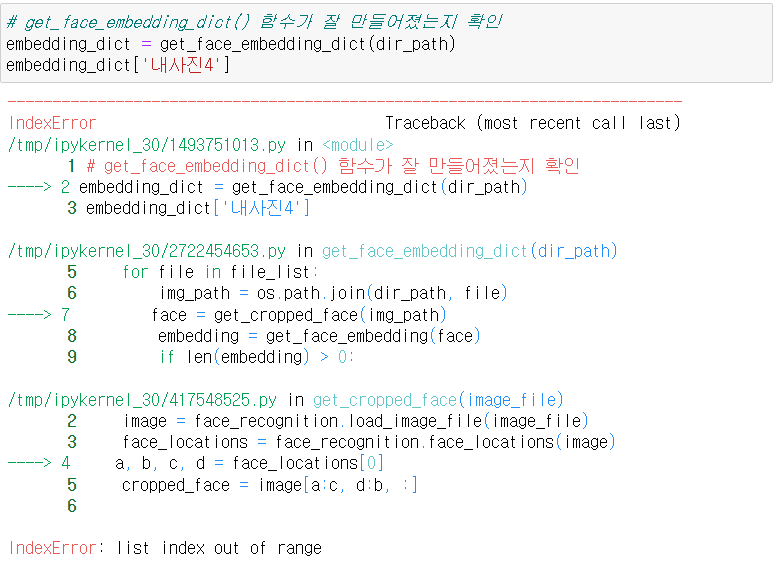
- 이번 프로젝트에서 모두를 괴롭힌 에러다. 사진을 인식하지 못해서 생기는 에러였는데, 사진을 여러번 찍어서 해결되는 경우가 있는가 하면, 사진의 사이즈를 줄여서 해결되는 경우도 있었다.
- 처음에는 모든 사진의 크기를 resize를 통해 바꿔서 넣고 싶었는데 실패하였다. 그래서 get_face_embedding_dict함수를 수정하여 진행하였다.

In [34]:
# 임베딩 리스트를 리턴하는 함수 정의
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

- 처음에는 함수를 위 코드와 같이 구현하였으나, try와 except를 이용하여 변형시킨 코드를 적용하였다.

### (2) 새로 시도한 것

- 이미지들을 한번에 나타낼 때, 그동안은 plt.subplot을 사용하여 나타냈었는데, 핸즈온 머신러닝 스터디를 통하여 "import matplotlib.gridspec as gridspec"를 통해서도  시각화를 나타내는 것을 보고 적용해보았다. 
    어떤 것이 더 간결하냐에 대해서는 별 차이가 없었던 것 같지만 새로운 방법을 사용했다는 것에 의의를 둔다.

### (3) 아쉬웠던 점

- 이미지 resize를 통해 임베딩을 시도해보지 못한 게 아쉽다. resize를 했을 때는 위에서 처럼 코드를 변형시키지 않은 상태에서도 location이 제대로 됐을까? 하는 의문이 있다. 추후 좀 더 수정해서 추가해 보도록 하겠다.

- 위에서 사용한 데이터 이미지들 간에 가장 가까운 거리를 가진 이미지들은 무엇일 지에 대해서도 시각화를 하고 싶었는데 시간이 부족하여 시도하지 못한 것이 아쉽다.\
    list index out of range에 대한 오류를 수정하는데에 너무 많은 시간을 소요한 것 같다.
    
- 이미지에 동물 사진이 들어간 것이 아닌데 face location이 되지 않는 것은 의문이다.

## 7. Referece

- resize (https://supermemi.tistory.com/entry/OpenCV-Resize-%EB%A1%9C-%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%9D%98-%ED%81%AC%EA%B8%B0%EB%A5%BC-%EC%A1%B0%EC%A0%88%ED%95%B4%EB%B3%B4%EC%9E%90)
- 핸즈온 14강 코랩 (https://colab.research.google.com/drive/1FTuISu7AKLUseazQEKWzcMeNoaCzLiRC?hl=ko#scrollTo=b6NdikGWSdFk)
